# "Business" Dynamics פרוייקט גמר ניתוח נתונים

In [2]:
from IPython.display import Image, display

image_url = "https://github.com/AlexTsiris/project1/blob/main/main-image-smaller.jpg?raw=true"
display(Image(url=image_url, width=700))


קבוצה 25 

מגישים: נתן וולף 

אלכסנדר ציריס 

בנימין בראונר

### קישורים למקורות 
https://www.kaggle.com/datasets/mexwell/business-dynamics?phase=FinishSSORegistration&returnUrl=%2Fdatasets%2Fmexwell%2Fbusiness-dynamics%2Fversions%2F1%3Fresource%3Ddownload&SSORegistrationToken=CfDJ8CHCUm6ypKVLpjizcZHPE73lp8mHz3NkQAXhbGxsjwPk_-L9mUcE-JePcg6f2xabUHYcTowxP9Dk3mEfrgtc9rZbPNwIe9wEvBvkOHDEKcZNbnODKZhhrYIcCK54rkwFXFqHZA3nFzzGogF18tWT5HNV9rFLU2ec47fqfa9y6CtHK-kyk17P1VPm1MDOnlcAt4uOhw7eGnFjynF5ppipW60i6Gj43Rt30ayXwCX-442J7lNMRThj2CcOOcWno10TGp-HVcYOGgICuJA9f5EQeVarHSGFFgBveDLYQAMwxrFzso4hClW-j-kKaYbHTdcrwnmxKSXdswTLQROGFL_sDFs&DisplayName=%D7%A0%D7%AA%D7%99+%D7%95%D7%95%D7%9C%D7%A3

https://www.census.gov/programs-surveys/bds/data.Datasets.html#list-tab-1518962401

מתוך הלשכה לסטטיסטיקה של ארצות הברית

קצת על הדאטה: הדאטה שלנו מדברת על עסקים בארצות הברית וממויינת לפי מדינות ושנים



שלב ראשון: ייבוא ספריות ובדיקת ערכים חסרים

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np
import plotly.express as px

In [8]:
url = "https://raw.githubusercontent.com/AlexTsiris/project1/main/business_dynamics.csv"
business_df = pd.read_csv(url)

In [9]:
if business_df.isnull().any().any():
    print("There are empty values ​​in DataFrame.")
else:
    print("There are not empty values ​​in DataFrame.")

There are not empty values ​​in DataFrame.


In [10]:
business_df.columns

Index(['State', 'Year', 'Data.DHS Denominator', 'Data.Number of Firms',
       'Data.Calculated.Net Job Creation',
       'Data.Calculated.Net Job Creation Rate',
       'Data.Calculated.Reallocation Rate', 'Data.Establishments.Entered',
       'Data.Establishments.Entered Rate', 'Data.Establishments.Exited',
       'Data.Establishments.Exited Rate',
       'Data.Establishments.Physical Locations', 'Data.Firm Exits.Count',
       'Data.Firm Exits.Establishment Exit', 'Data.Firm Exits.Employments',
       'Data.Job Creation.Births', 'Data.Job Creation.Continuers',
       'Data.Job Creation.Count', 'Data.Job Creation.Rate',
       'Data.Job Creation.Rate/Births', 'Data.Job Destruction.Continuers',
       'Data.Job Destruction.Count', 'Data.Job Destruction.Deaths',
       'Data.Job Destruction.Rate', 'Data.Job Destruction.Rate/Deaths'],
      dtype='object')

In [11]:
business_df.shape

(1927, 25)

In [12]:
len(business_df.groupby("State"))

47

In [13]:
len(business_df.groupby("Year"))

41

מצאנו שאין ערכים חסרים, ושיש 1927 שורות שמדברות על 47 מדינות על פני 41 שנים

בדיקת מצב שוק העבודה בארצות הברית בשנים 1978-2018

In [16]:
usa_data =  business_df.groupby("Year")[['Data.Calculated.Net Job Creation']].sum().reset_index()
usa_data

,Year,Data.Calculated.Net Job Creation
0,1978,4890247
1,1979,4007005
2,1980,387682
3,1981,798676
4,1982,465009
5,1983,65443
6,1984,5187128
7,1985,3661896
8,1986,2629693
9,1987,1572381


Text(0.5, 1.0, 'Job Creation in USA')

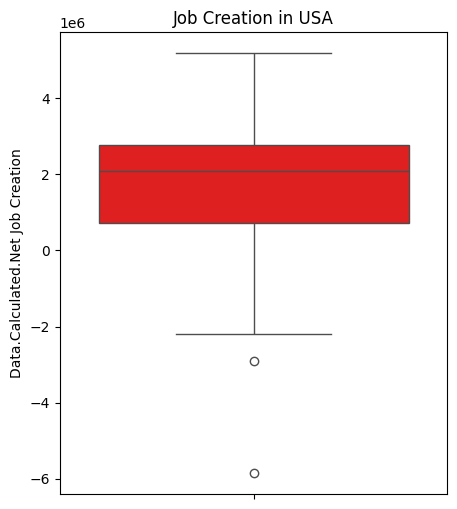

In [17]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(data=usa_data["Data.Calculated.Net Job Creation"], ax=ax, color="red")
ax.set_title("Job Creation in USA")

מצאנו שיש שני נתונים חריגים בעמודה של סך נטו מקומות העבודה שנוספו 

ננסה ליצור גרף יותר טוב שיסביר על כך

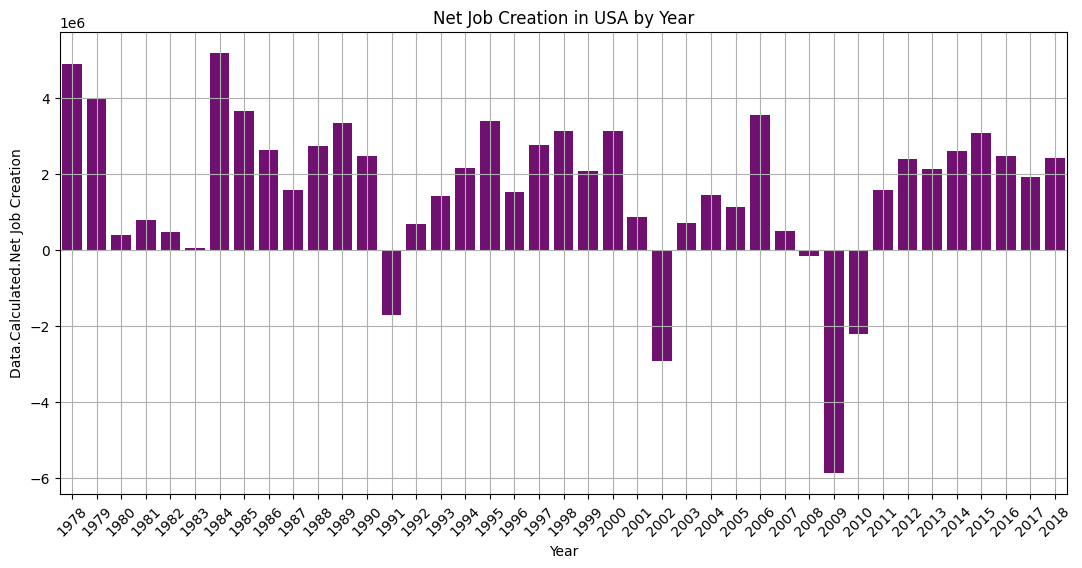

In [19]:
plt.figure(figsize=(13, 6))
sns.barplot(x='Year', y='Data.Calculated.Net Job Creation', data=usa_data, color='purple')
plt.title('Net Job Creation in USA by Year')
plt.xticks(rotation=45)  
plt.grid(True)

ניתן לראות שבשנים 1991,2001,2008 יש ירידה חדה במספר מקומות העבודה שנוצרו, כלומר בשנים האלו יש משבר כלכלי 

# מסקנה ראשונה

## ננסה לגלות איזו מדינה יודעת להתגבר על משברים בצורה הטובה ביותר

נעשה לכל מדינה ממוצע של 5 שנים לפני המשבר ונחלק בממוצע של 5 שנים אחרי המשבר ונקבל מספר 

אם המספר גדול מ1 אז בממוצע יש גידול במקומות העבודה זה אומר שהמדינה התגברה על המשבר בהצלחה

אם הוא קטן מאחד אז יש בממוצע ירידה במקומות העבודה ולכן המדינה לא התגברה טוב על המשבר   

משבר ראשון שנת 1991 



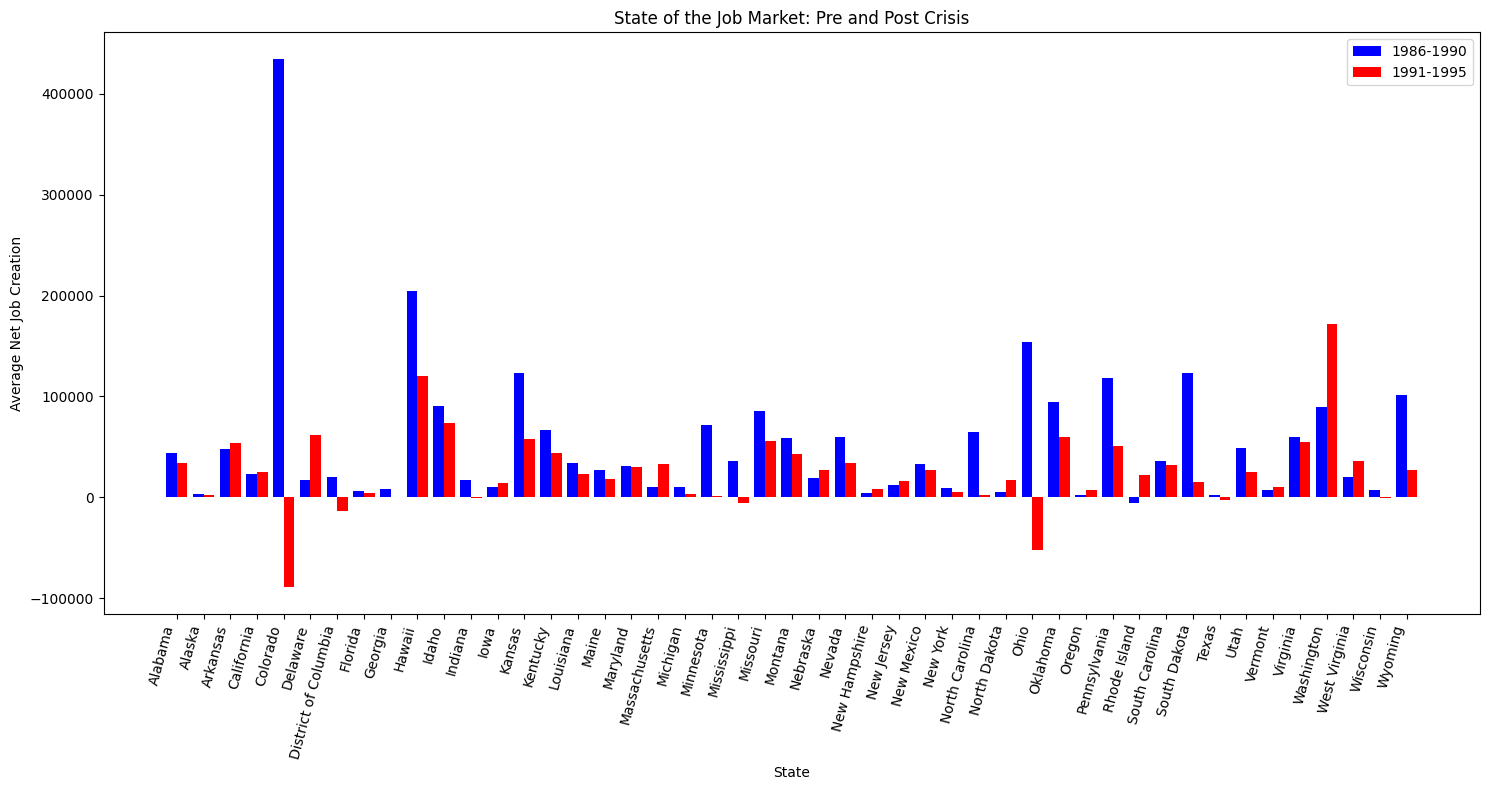

In [24]:
total_jobs_1986_1990 = business_df[(business_df["Year"] < 1991) & (business_df["Year"] >= 1986)].groupby("State")["Data.Calculated.Net Job Creation"].mean()
total_jobs_1991_1995 = business_df[(business_df["Year"] >= 1991) & (business_df["Year"] < 1996)].groupby("State")["Data.Calculated.Net Job Creation"].mean()
combined_df = pd.DataFrame({'1986-1990': total_jobs_1986_1990,'1991-1995': total_jobs_1991_1995})

bar_width = 0.4  
fig, ax = plt.subplots(figsize=(15, 8))
indices = np.arange(len(combined_df))
bars1 = ax.bar(indices - bar_width/2, combined_df['1986-1990'], bar_width, label='1986-1990', color='blue')
bars2 = ax.bar(indices + bar_width/2, combined_df['1991-1995'], bar_width, label='1991-1995', color='red')
ax.set_title('State of the Job Market: Pre and Post Crisis')
ax.set_xlabel('State')
ax.set_ylabel('Average Net Job Creation')
ax.set_xticks(indices)
ax.set_xticklabels(combined_df.index, rotation=75, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [25]:
percent_change_1 = ( total_jobs_1991_1995 / total_jobs_1986_1990)
percent_change_1

State
Alabama                 0.771534
Alaska                  0.807656
Arkansas                1.137689
California              1.082365
Colorado               -0.205190
Delaware                3.660313
District of Columbia   -0.654451
Florida                 0.770243
Georgia                 0.033788
Hawaii                  0.586101
Idaho                   0.812443
Indiana                -0.036371
Iowa                    1.356706
Kansas                  0.464466
Kentucky                0.663394
Louisiana               0.678312
Maine                   0.694745
Maryland                0.972058
Massachusetts           3.307951
Michigan                0.310670
Minnesota               0.015937
Mississippi            -0.143575
Missouri                0.658044
Montana                 0.732118
Nebraska                1.400583
Nevada                  0.558482
New Hampshire           1.955006
New Jersey              1.286929
New Mexico              0.828969
New York                0.610368
Nort

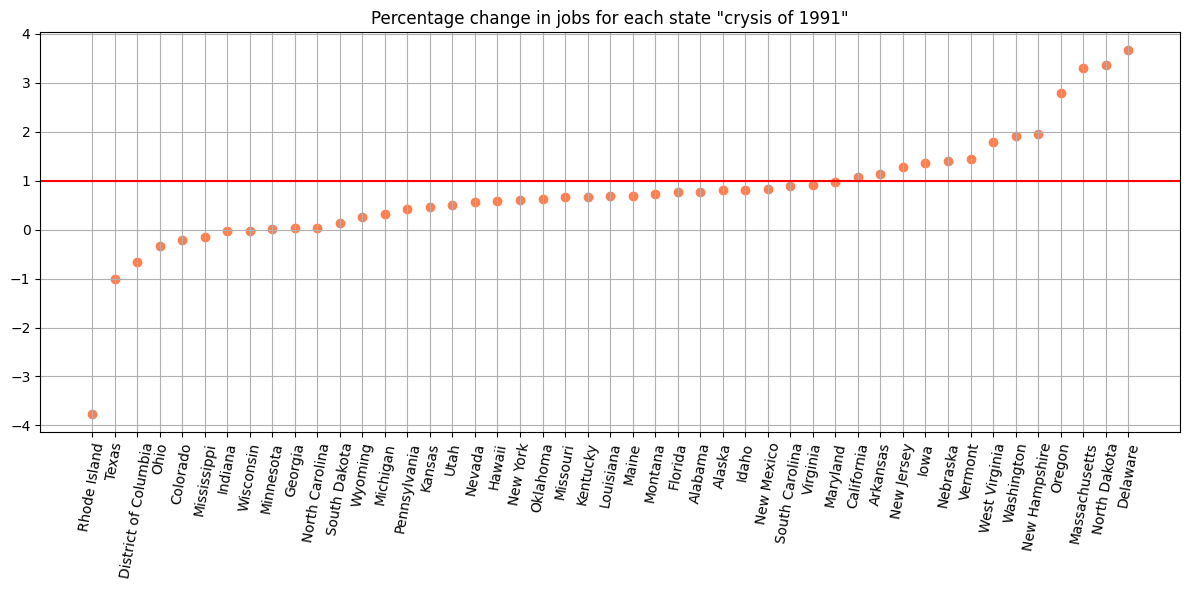

In [26]:
sorted_percent_change_1 = percent_change_1.sort_values()

plt.figure(figsize=(12, 6))
plt.scatter(sorted_percent_change_1.index, sorted_percent_change_1.values, color='coral')
plt.title('Percentage change in jobs for each state "crysis of 1991"')
plt.xticks(rotation=80)
plt.axhline(y=1, color='red', linestyle='-')
plt.grid(True)
plt.tight_layout()
plt.show()

ניתן לראות שישנן 13 מדינות שהיחס שהתקבל עבורן גבוה מאחד והן המדינות שהצליחו להתגבר על המשבר של 1991 

### משבר שני שנת 2001 

במשבר הזה ניקח 5 שנים לפני המשבר ורק 4 שנים אחרי המשבר כדי שהשנים שלפני המשבר הבא (2008) לא ייתנגשו 

מכיוון שאנחנו לא עושים סכום אלא ממוצע אז החישוב לא ייפגע

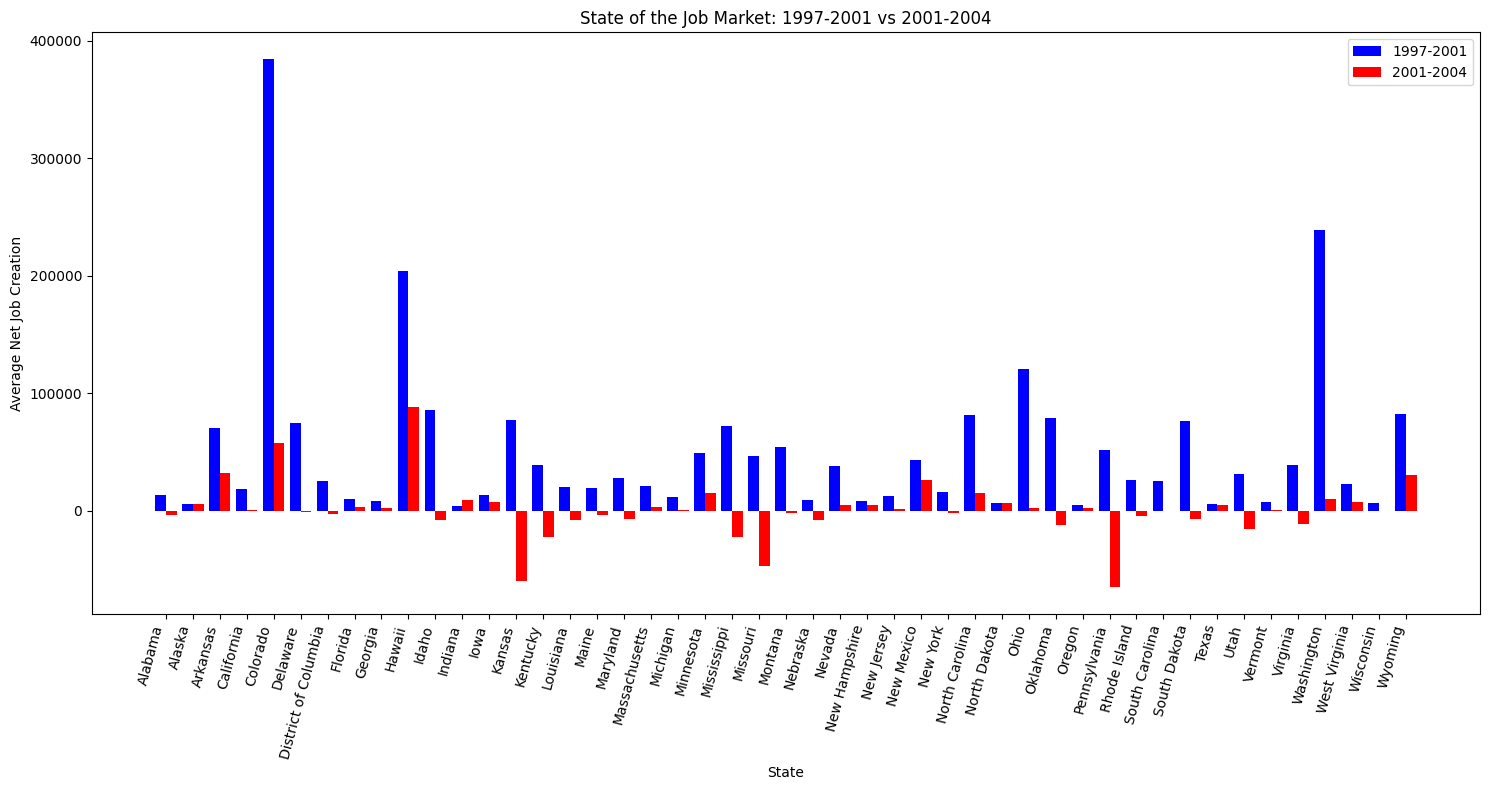

In [29]:
total_jobs_1997_2001 = business_df[(business_df["Year"] < 2002) & (business_df["Year"]>=1997)].groupby("State")["Data.Calculated.Net Job Creation"].mean()
total_jobs_2001_2004 = business_df[(business_df["Year"] >= 2001) & (business_df["Year"] < 2005)].groupby("State")["Data.Calculated.Net Job Creation"].mean()

combined_df2 = pd.DataFrame({'1997-2001': total_jobs_1997_2001,'2001-2004': total_jobs_2001_2004})

bar_width = 0.4  
fig, ax = plt.subplots(figsize=(15, 8))
indices = np.arange(len(combined_df2))
bars1 = ax.bar(indices - bar_width/2, combined_df2['1997-2001'], bar_width, label='1997-2001', color='blue')
bars2 = ax.bar(indices + bar_width/2, combined_df2['2001-2004'], bar_width, label='2001-2004', color='red')
ax.set_title('State of the Job Market: 1997-2001 vs 2001-2004')
ax.set_xlabel('State')
ax.set_ylabel('Average Net Job Creation')
ax.set_xticks(indices)
ax.set_xticklabels(combined_df2.index, rotation=75, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [30]:
percent_change_2 = ( total_jobs_2001_2004 / total_jobs_1997_2001)

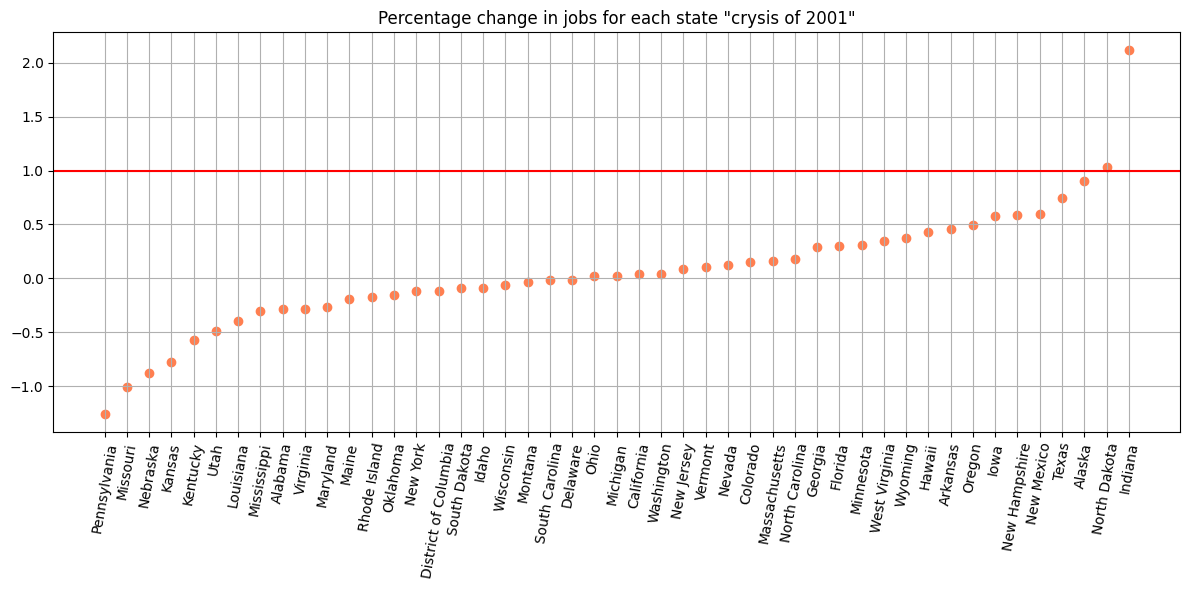

In [31]:
sorted_percent_change_2 = percent_change_2.sort_values()

plt.figure(figsize=(12, 6))
plt.scatter(sorted_percent_change_2.index, sorted_percent_change_2.values, color='coral')
plt.title('Percentage change in jobs for each state "crysis of 2001"')
plt.xticks(rotation=80)
plt.axhline(y=1, color='red', linestyle='-')
plt.grid(True)
plt.tight_layout()
plt.show()

נתן לראות שבמשבר של 2001 רק 2 מדינות הצליחו להתגבר על המשבר  

משבר שלישי שנת 2008 

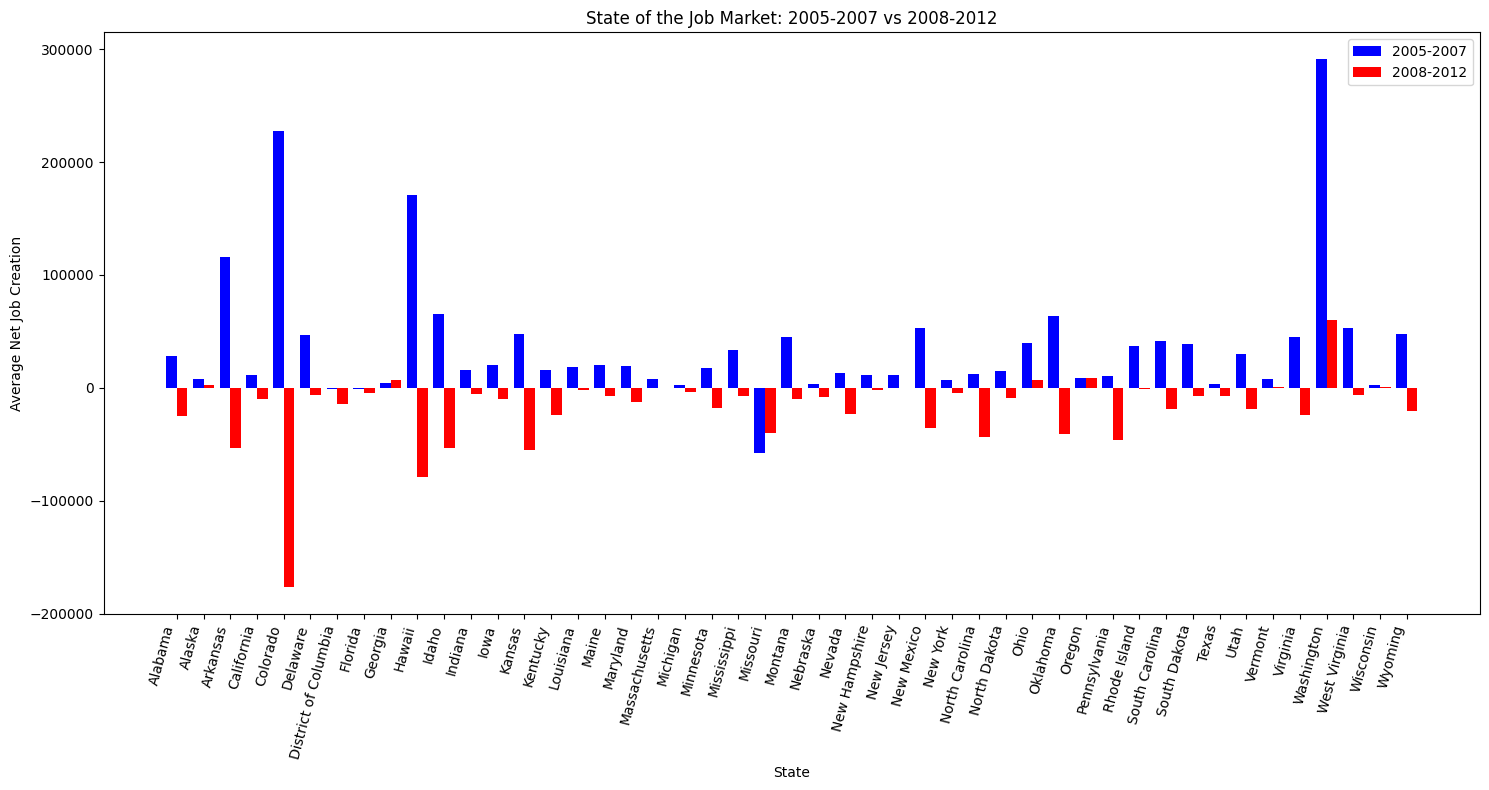

In [34]:
total_jobs_2005_2007 = business_df[(business_df["Year"] < 2008) & (business_df["Year"] >= 2005)].groupby("State")["Data.Calculated.Net Job Creation"].mean()
total_jobs_2008_2012 = business_df[(business_df["Year"] >= 2008) & (business_df["Year"] < 2013)].groupby("State")["Data.Calculated.Net Job Creation"].mean()


combined_df3 = pd.DataFrame({'2005-2007': total_jobs_2005_2007,'2008-2012': total_jobs_2008_2012})

bar_width = 0.4  
fig, ax = plt.subplots(figsize=(15, 8))
indices = np.arange(len(combined_df3))
bars1 = ax.bar(indices - bar_width/2, combined_df3['2005-2007'], bar_width, label='2005-2007', color='blue')
bars2 = ax.bar(indices + bar_width/2, combined_df3['2008-2012'], bar_width, label='2008-2012', color='red')
ax.set_title('State of the Job Market: 2005-2007 vs 2008-2012')
ax.set_xlabel('State')
ax.set_ylabel('Average Net Job Creation')
ax.set_xticks(indices)
ax.set_xticklabels(combined_df3.index, rotation=75, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [35]:
percent_change_3 = ( total_jobs_2008_2012 / total_jobs_2005_2007)

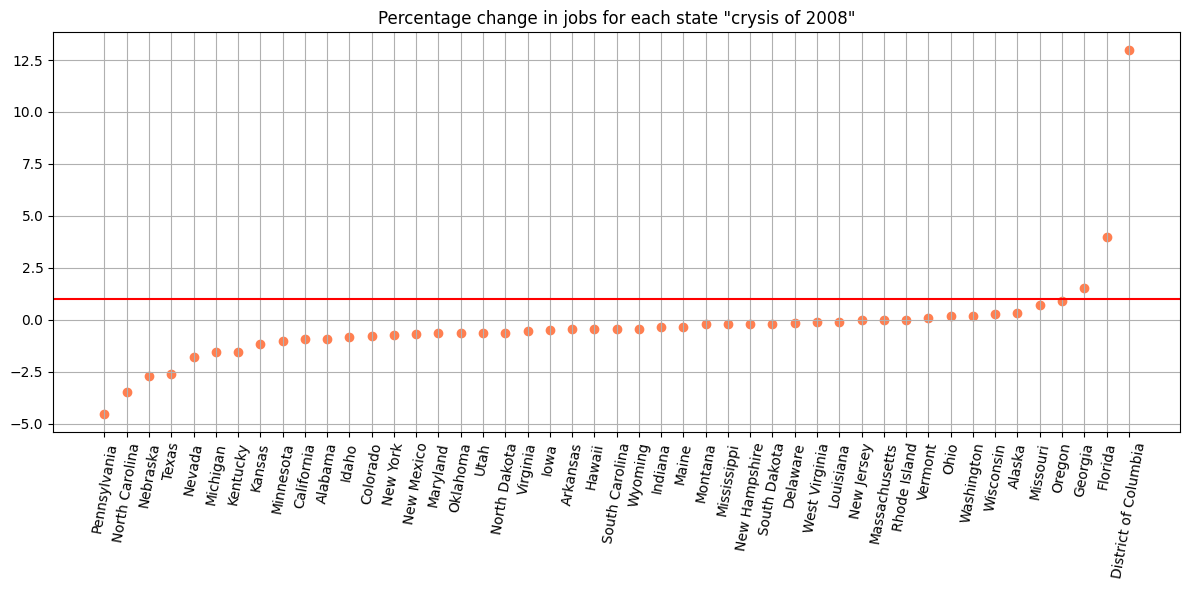

In [36]:
sorted_percent_change_3 = percent_change_3.sort_values()

plt.figure(figsize=(12, 6))
plt.scatter(sorted_percent_change_3.index, sorted_percent_change_3.values, color='coral')
plt.title('Percentage change in jobs for each state "crysis of 2008"')
plt.axhline(y=1, color='red', linestyle='-')
plt.xticks(rotation=80)
plt.grid(True)
plt.tight_layout()
plt.show()

ניתן לראות שרק 3 מדינות הצליחו להתגבר על המשבר של שנת 2008

עכשיו ניקח את כל האחוזים של השינויים לפני ואחרי משברים ונעשה להם ממוצע ונמצא את המדינה האידיאלית

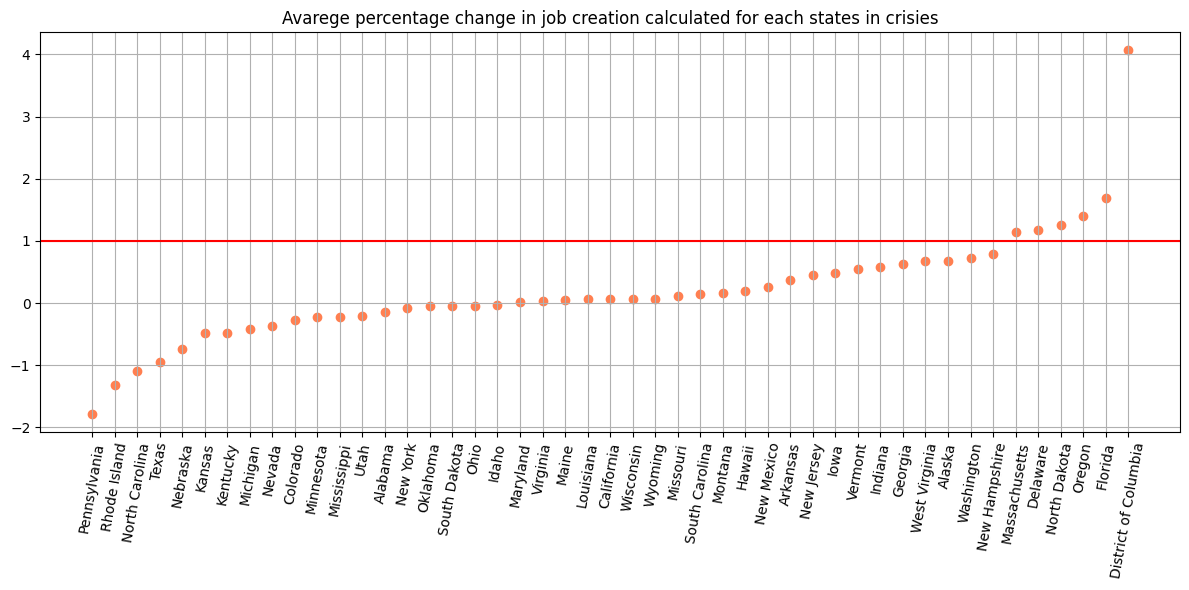

In [39]:
avarege_persent = (percent_change_1 + percent_change_2 + percent_change_3)/3
avarege_persent_sorted = avarege_persent.sort_values()

plt.figure(figsize=(12, 6))
plt.scatter(avarege_persent_sorted.index, avarege_persent_sorted.values, color='coral')
plt.title('Avarege percentage change in job creation calculated for each states in crisies')
plt.axhline(y=1, color='red', linestyle='-')
plt.xticks(rotation=80)
plt.grid(True)
plt.tight_layout()
plt.show()

# מסקנה ראשונה: ניהול משברים יעיל וצמיחה בכמות משרות

## מתוך 47 המדינות שניתחנו בארצות הברית, רק 6 מדינות הפגינו ניהול יעיל בשנות משבר מבחינת גידול חיובי במספר מקומות העבודה

### התפתחות למול התרחבות

התרחבות - פתיחת סניף 

התפתחות - הגדלת צוות הצוות בסניף הקיים

Text(0.5, 1.0, 'Job Creation: Continuers vs Births')

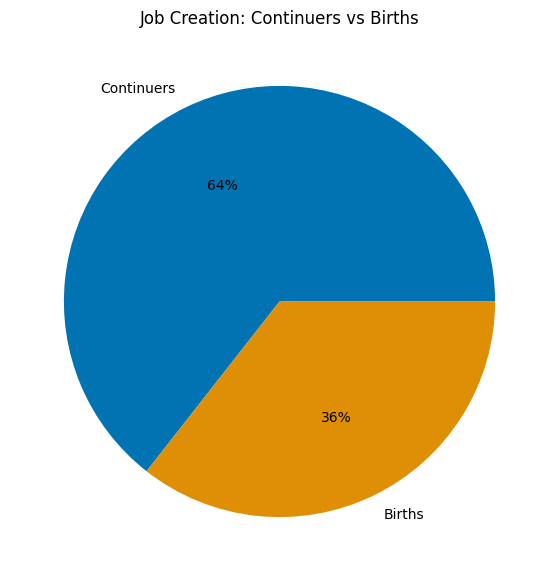

In [42]:
business_dynamic_df =  business_df[['Data.Job Creation.Continuers','Data.Job Creation.Births']].sum().reset_index()
palette_color = sns.color_palette("colorblind")
plt.figure(figsize=(7,7))
plt.pie(business_dynamic_df[0], labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
plt.title('Job Creation: Continuers vs Births')

### יחס יצירת מקומות עבודה של התרחבות מול התפתחות לפני ואחרי משברים

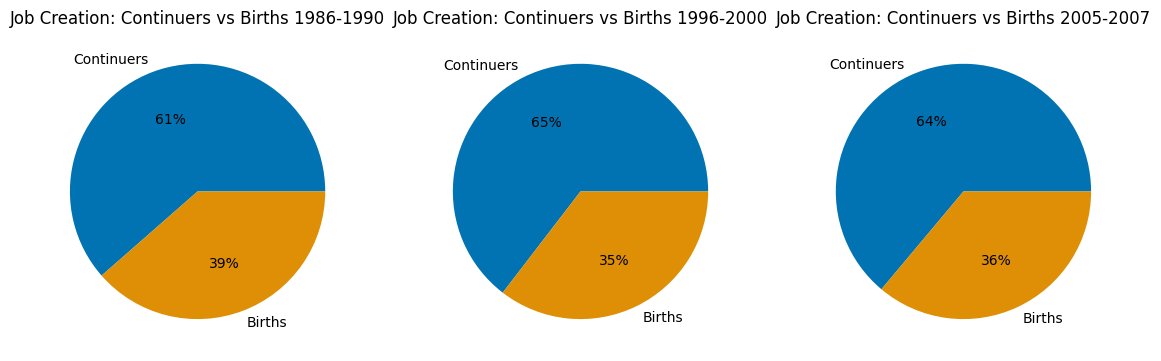

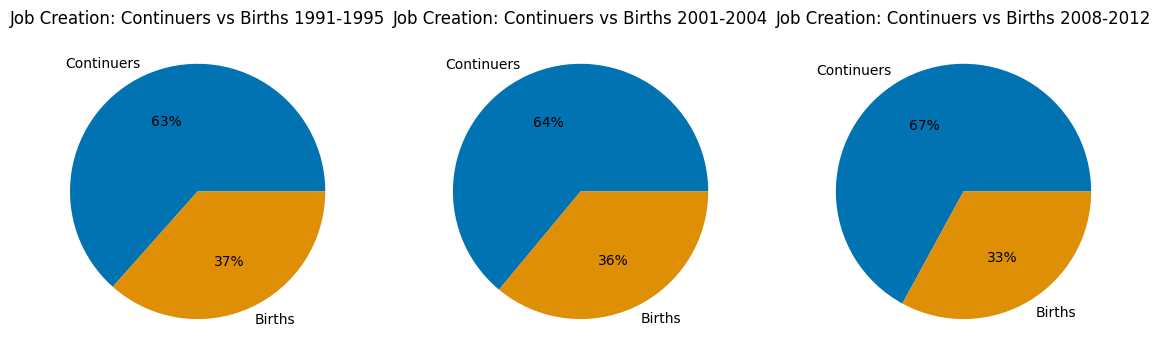

In [44]:
old_vs_new_1986_1990 = business_df[(business_df["Year"] >= 1986) & (business_df["Year"] < 1991)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_1996_2000 = business_df[(business_df["Year"] >= 1996) & (business_df["Year"] < 2001)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_2005_2007 = business_df[(business_df["Year"] >= 2005) & (business_df["Year"] < 2008)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
palette_color = sns.color_palette("colorblind") 

axs[0].pie(old_vs_new_1986_1990, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[0].set_title('Job Creation: Continuers vs Births 1986-1990')
axs[1].pie(old_vs_new_1996_2000, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[1].set_title('Job Creation: Continuers vs Births 1996-2000')
axs[2].pie(old_vs_new_2005_2007, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[2].set_title('Job Creation: Continuers vs Births 2005-2007')
plt.show()

old_vs_new_1991_1995 = business_df[(business_df["Year"] >= 1991) & (business_df["Year"] < 1996)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_2001_2004 = business_df[(business_df["Year"] >= 2001) & (business_df["Year"] < 2005)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_2008_2012 = business_df[(business_df["Year"] >= 2008) & (business_df["Year"] < 2013)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
palette_color = sns.color_palette("colorblind") 

axs[0].pie(old_vs_new_1991_1995, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[0].set_title('Job Creation: Continuers vs Births 1991-1995')
axs[1].pie(old_vs_new_2001_2004, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[1].set_title('Job Creation: Continuers vs Births 2001-2004')
axs[2].pie(old_vs_new_2008_2012, labels=['Continuers', 'Births'], colors=palette_color, autopct='%.0f%%')
axs[2].set_title('Job Creation: Continuers vs Births 2008-2012')
plt.show()

## מסקנת ביניים: היחס בין התרחבות מול התפתחות לא מושפע על ידי משברים

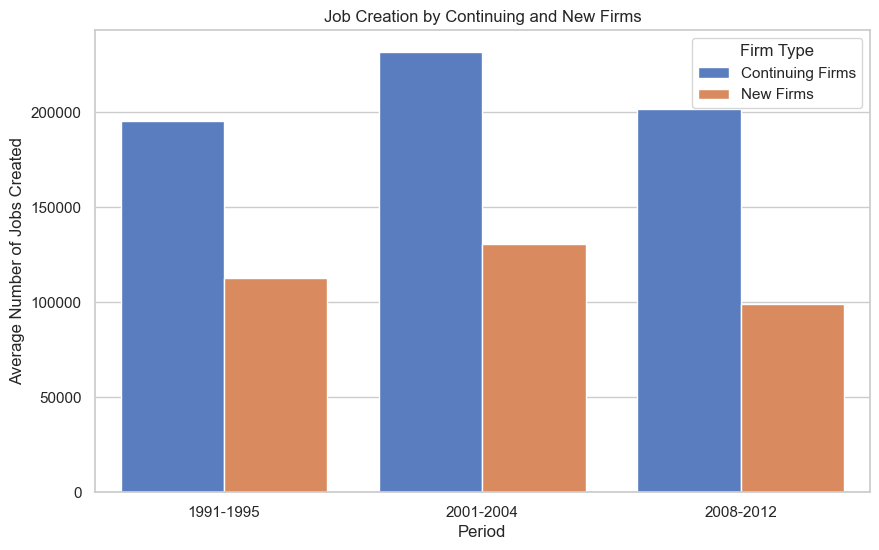

In [46]:
old_vs_new_1991_1995 = business_df[(business_df["Year"] >= 1991) & (business_df["Year"] < 1996)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_2001_2004 = business_df[(business_df["Year"] >= 2001) & (business_df["Year"] < 2005)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()
old_vs_new_2008_2012 = business_df[(business_df["Year"] >= 2008) & (business_df["Year"] < 2013)][['Data.Job Creation.Continuers','Data.Job Creation.Births']].mean()

periods = ['1991-1995', '2001-2004', '2008-2012']
job_creation_continuers = [old_vs_new_1991_1995['Data.Job Creation.Continuers'], old_vs_new_2001_2004['Data.Job Creation.Continuers'], old_vs_new_2008_2012['Data.Job Creation.Continuers']]
job_creation_births = [old_vs_new_1991_1995['Data.Job Creation.Births'], old_vs_new_2001_2004['Data.Job Creation.Births'], old_vs_new_2008_2012['Data.Job Creation.Births']]

data_for_plot = pd.DataFrame({'Period': periods,'Continuing Firms': job_creation_continuers,'New Firms': job_creation_births})
data_for_plot_melted = data_for_plot.melt(id_vars='Period', var_name='Firm Type', value_name='Job Creation')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Period', y='Job Creation', hue='Firm Type', data=data_for_plot_melted, palette='muted')
plt.title('Job Creation by Continuing and New Firms')
plt.ylabel('Average Number of Jobs Created')
plt.xlabel('Period')
plt.legend(title='Firm Type')
plt.show()

הגענו למצב של חוסר נתונים. נבדוק את תרומת העסקים לפי וותק. לכן לקחנו דאטה משלים של אותו ארגון "לשכת לסטטיסטיקה של ארצות הברית" לצורך ניתוח עמוק יותר

In [48]:
url2 ="https://raw.githubusercontent.com/AlexTsiris/project1/main/Updated_Business_Dynamics_Data.csv"
business_df_add = pd.read_csv(url2)

In [49]:
if business_df_add.isnull().any().any():
    print("There are empty values ​​in DataFrame.")
else:
    print("There are not empty values ​​in DataFrame.")

There are not empty values ​​in DataFrame.


In [50]:
business_df_add.head(10)

,year,fage,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1978,a) 0,486456,493546,2545510,1272772,493546,199.998,0,0.000,...,0,0,0.000,0.000,2545479,199.995,0.000,0,0,0
1,1978,b) 1,355229,365696,2345414,2327670,4560,1.072,123700,29.088,...,510065,250310,21.913,32.667,47548,2.043,65.334,98343,99093,416237
2,1978,c) 2,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
3,1978,d) 3,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
4,1978,e) 4,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
5,1978,f) 5,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
6,1978,g) 6 to 10,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
7,1978,h) 11 to 15,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
8,1978,i) 16 to 20,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0
9,1978,j) 21 to 25,0,0,0,0,0,0.000,0,0.000,...,0,0,0.000,0.000,0,0.000,0.000,0,0,0


נחלק את וותק העסקים ל3 טווחים עסק חדש 0-3 שנים, עסק עם וותק בינוני 3-6 שנים ועסק וותיק +6 שנים 

In [52]:
def categorize_fage(fage):
    if fage in ['a) 0', 'b) 1', 'c) 2', 'd) 3']:
        return '0-3'
    elif fage in ['e) 4', 'f) 5', 'g) 6']:
        return '3-6'
    else:
        return '6+'

business_df_add['age_group'] = business_df_add['fage'].apply(categorize_fage)
business_df_add

,year,fage,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,age_group
0,1978,a) 0,486456,493546,2545510,1272772,493546,199.998,0,0.000,...,0,0.000,0.000,2545479,199.995,0.000,0,0,0,0-3
1,1978,b) 1,355229,365696,2345414,2327670,4560,1.072,123700,29.088,...,250310,21.913,32.667,47548,2.043,65.334,98343,99093,416237,0-3
2,1978,c) 2,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,0-3
3,1978,d) 3,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,0-3
4,1978,e) 4,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,3-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2021,h) 11 to 15,632891,704549,8601935,8937309,28845,3.976,70657,9.740,...,1244479,4.875,18.799,-668608,-7.481,22.636,51060,52709,296922,6+
524,2021,i) 16 to 20,495082,578719,8401544,8682141,22139,3.726,53033,8.926,...,1086342,4.262,16.774,-560757,-6.459,20.631,36768,37903,224527,6+
525,2021,j) 21 to 25,373589,477686,7949876,8298188,17959,3.661,43625,8.894,...,1109564,4.166,17.537,-694978,-8.375,18.325,27716,29592,169563,6+
526,2021,k) 26+,806180,1268303,28635426,29708139,42142,3.247,101636,7.830,...,3497261,3.349,15.121,-2146441,-7.225,15.793,58189,62204,395887,6+


In [53]:
business_df_add_2018 = business_df_add[business_df_add['year'] <= 2018]
business_df_add_2018

,year,fage,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,age_group
0,1978,a) 0,486456,493546,2545510,1272772,493546,199.998,0,0.000,...,0,0.000,0.000,2545479,199.995,0.000,0,0,0,0-3
1,1978,b) 1,355229,365696,2345414,2327670,4560,1.072,123700,29.088,...,250310,21.913,32.667,47548,2.043,65.334,98343,99093,416237,0-3
2,1978,c) 2,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,0-3
3,1978,d) 3,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,0-3
4,1978,e) 4,0,0,0,0,0,0.000,0,0.000,...,0,0.000,0.000,0,0.000,0.000,0,0,0,3-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2018,h) 11 to 15,688624,758384,9419379,9454156,22583,2.903,61911,7.957,...,787443,4.186,12.515,-67645,-0.716,23.599,44156,45478,290797,6+
488,2018,i) 16 to 20,480480,573782,8898798,8961127,16078,2.743,40602,6.928,...,767938,3.678,12.248,-121304,-1.354,21.788,27422,28636,196725,6+
489,2018,j) 21 to 25,389665,502545,8829104,8850808,14115,2.754,33951,6.625,...,730905,3.517,11.776,-41196,-0.465,22.620,21923,23139,156770,6+
490,2018,k) 26+,742594,1135287,25575226,25576905,30253,2.620,69418,6.011,...,1790082,2.667,9.666,-7100,-0.028,19.276,39829,41950,285770,6+


In [54]:
cols_to_sum = ['job_creation', 'job_destruction']
grouped_data = business_df_add_2018.groupby(['year', 'age_group'])[cols_to_sum].sum().reset_index()
grouped_data.to_csv('grouped_bds2018_fa.csv', index=False)

In [55]:
business_df_update = business_df.groupby("Year")[['Data.Job Creation.Births', 'Data.Job Creation.Continuers',
       'Data.Job Creation.Count', 'Data.Job Destruction.Continuers',
       'Data.Job Destruction.Count', 'Data.Job Destruction.Deaths']].sum().reset_index()
business_df_update
business_df_update.to_csv('business_df_update.csv', index=False)

In [56]:
url3 ="https://raw.githubusercontent.com/AlexTsiris/project1/main/grouped_bds2018_fa.csv"
url4 = "https://raw.githubusercontent.com/AlexTsiris/project1/main/business_df_update.csv"
data_1 = pd.read_csv(url3)
data_2 = pd.read_csv(url4)

merged_df = pd.merge(data_2, data_1, left_on='Year', right_on='year')
merged_df = merged_df.drop(columns=['year'])
merged_df.head(10)

,Year,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Creation.Count,Data.Job Destruction.Continuers,Data.Job Destruction.Count,Data.Job Destruction.Deaths,age_group,job_creation,job_destruction
0,1978,4962352,9015212,13977564,5179679,9087317,3907638,0-3,3353435,760375
1,1978,4962352,9015212,13977564,5179679,9087317,3907638,3-6,0,0
2,1978,4962352,9015212,13977564,5179679,9087317,3907638,6+,10897331,8305176
3,1979,4632428,8582998,13215426,5741812,9208421,3466609,0-3,3802210,1494354
4,1979,4632428,8582998,13215426,5741812,9208421,3466609,3-6,0,0
5,1979,4632428,8582998,13215426,5741812,9208421,3466609,6+,9891850,7906276
6,1980,4428137,7103139,11531276,7565920,11143594,3577674,0-3,3818693,2197929
7,1980,4428137,7103139,11531276,7565920,11143594,3577674,3-6,0,0
8,1980,4428137,7103139,11531276,7565920,11143594,3577674,6+,7969225,9172599
9,1981,4442950,6974604,11417554,7462470,10618878,3156408,0-3,3987623,1992539


ניצור עמודה חדשה שמתארת את מספר העבודות נטו לכל וותק

In [58]:
merged_df["net_job_calculated"]  = merged_df['job_creation'] - merged_df['job_destruction']
merged_df

,Year,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Creation.Count,Data.Job Destruction.Continuers,Data.Job Destruction.Count,Data.Job Destruction.Deaths,age_group,job_creation,job_destruction,net_job_calculated
0,1978,4962352,9015212,13977564,5179679,9087317,3907638,0-3,3353435,760375,2593060
1,1978,4962352,9015212,13977564,5179679,9087317,3907638,3-6,0,0,0
2,1978,4962352,9015212,13977564,5179679,9087317,3907638,6+,10897331,8305176,2592155
3,1979,4632428,8582998,13215426,5741812,9208421,3466609,0-3,3802210,1494354,2307856
4,1979,4632428,8582998,13215426,5741812,9208421,3466609,3-6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
118,2017,4901042,11248397,16149439,9515116,14237709,4722593,3-6,725211,766084,-40873
119,2017,4901042,11248397,16149439,9515116,14237709,4722593,6+,12531830,12853929,-322099
120,2018,4799452,10789981,15589433,9055893,13174032,4118139,0-3,3906136,1475088,2431048
121,2018,4799452,10789981,15589433,9055893,13174032,4118139,3-6,679869,718219,-38350


In [59]:
old_vs_new_1991_1995 = merged_df[(merged_df["Year"] >= 1991) & (merged_df["Year"] < 1996)][[ "Year" ,"age_group",'net_job_calculated']]
old_vs_new_1991_1995 = old_vs_new_1991_1995.groupby("age_group")['net_job_calculated'].mean()
old_vs_new_2001_2004 = merged_df[(merged_df["Year"] >= 2001) & (merged_df["Year"] < 2005)][[ "Year" ,"age_group",'net_job_calculated']]
old_vs_new_2001_2004 = old_vs_new_2001_2004.groupby("age_group")['net_job_calculated'].mean()
old_vs_new_2008_2013 = merged_df[(merged_df["Year"] >= 2008) & (merged_df["Year"] < 2013)][[ "Year" ,"age_group",'net_job_calculated']]
old_vs_new_2008_2013 = old_vs_new_2008_2013.groupby("age_group")['net_job_calculated'].mean()

In [60]:
old_vs_new_1991_1995

age_group
0-3    2242156.0
3-6    -190592.6
6+    -1017483.6
Name: net_job_calculated, dtype: float64

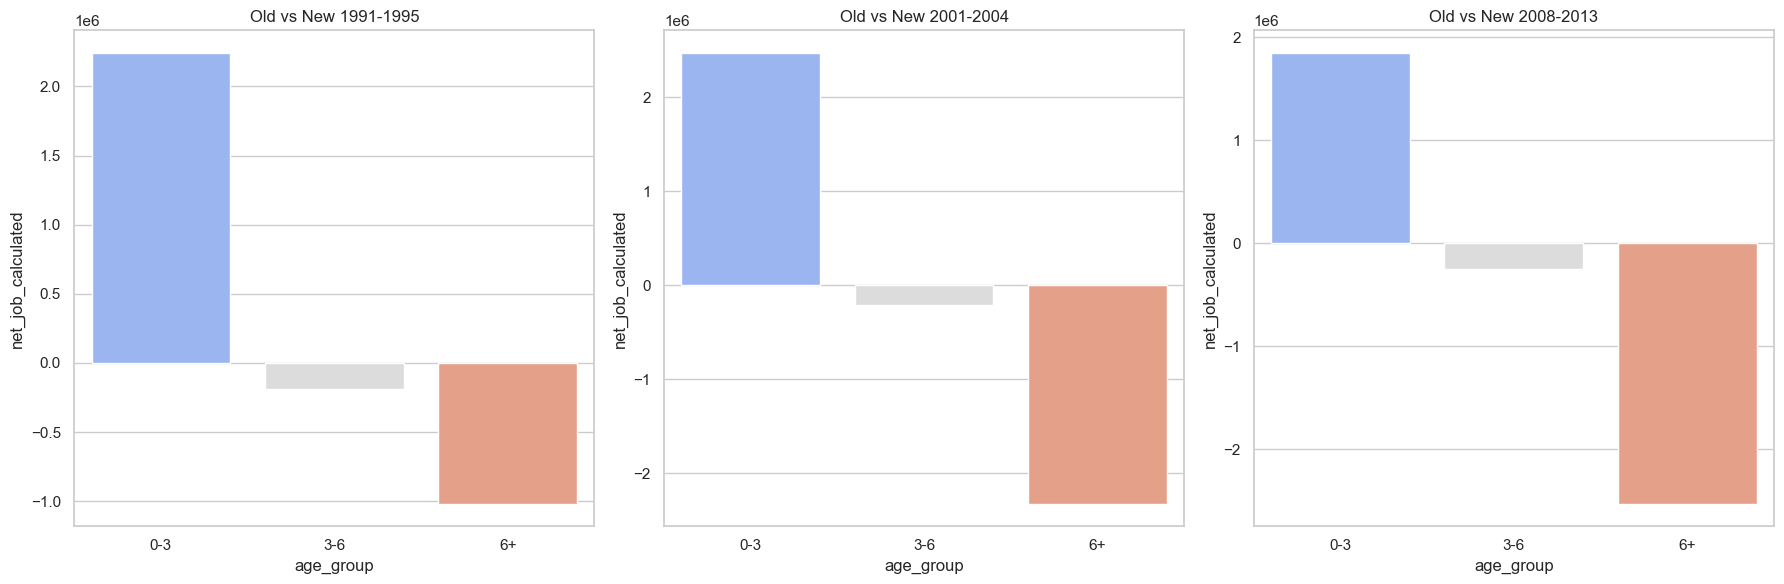

In [61]:
age_group_df1 = pd.DataFrame(old_vs_new_1991_1995).reset_index()
age_group_df2 = pd.DataFrame(old_vs_new_2001_2004).reset_index()
age_group_df3 = pd.DataFrame(old_vs_new_2008_2013).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='age_group', y='net_job_calculated', data=age_group_df1, hue='age_group',  ax=axes[0], palette='coolwarm')
axes[0].set_title('Old vs New 1991-1995')
sns.barplot(x='age_group', y='net_job_calculated', data=age_group_df2, hue='age_group', ax=axes[1], palette='coolwarm')
axes[1].set_title('Old vs New 2001-2004')
sns.barplot(x='age_group', y='net_job_calculated', data=age_group_df3,  hue='age_group',ax=axes[2], palette='coolwarm')
axes[2].set_title('Old vs New 2008-2013')
plt.tight_layout()
plt.show()

###  גילינו שעסקים חדשים תורמים הרבה יותר מקומות עבודה לאחר משברים מאשר עסקים ישנים 

נחפש את היחס יצירת מקומות עבודה לפי וותק ביחס לסך מקומות העבודה שנוצרו 

ואת היחס צמצום מקומות העבודה ביחס לסך המקומות שנסגרו

In [64]:
merged_df["job_creation_rate"] = merged_df["job_creation"] / merged_df["Data.Job Creation.Count"]
merged_df["job_destruction_rate"] = merged_df["job_destruction"] / merged_df["Data.Job Destruction.Count"]
merged_df

,Year,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Creation.Count,Data.Job Destruction.Continuers,Data.Job Destruction.Count,Data.Job Destruction.Deaths,age_group,job_creation,job_destruction,net_job_calculated,job_creation_rate,job_destruction_rate
0,1978,4962352,9015212,13977564,5179679,9087317,3907638,0-3,3353435,760375,2593060,0.239916,0.083674
1,1978,4962352,9015212,13977564,5179679,9087317,3907638,3-6,0,0,0,0.000000,0.000000
2,1978,4962352,9015212,13977564,5179679,9087317,3907638,6+,10897331,8305176,2592155,0.779630,0.913930
3,1979,4632428,8582998,13215426,5741812,9208421,3466609,0-3,3802210,1494354,2307856,0.287710,0.162281
4,1979,4632428,8582998,13215426,5741812,9208421,3466609,3-6,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2017,4901042,11248397,16149439,9515116,14237709,4722593,3-6,725211,766084,-40873,0.044906,0.053807
119,2017,4901042,11248397,16149439,9515116,14237709,4722593,6+,12531830,12853929,-322099,0.775992,0.902809
120,2018,4799452,10789981,15589433,9055893,13174032,4118139,0-3,3906136,1475088,2431048,0.250563,0.111969
121,2018,4799452,10789981,15589433,9055893,13174032,4118139,3-6,679869,718219,-38350,0.043611,0.054518


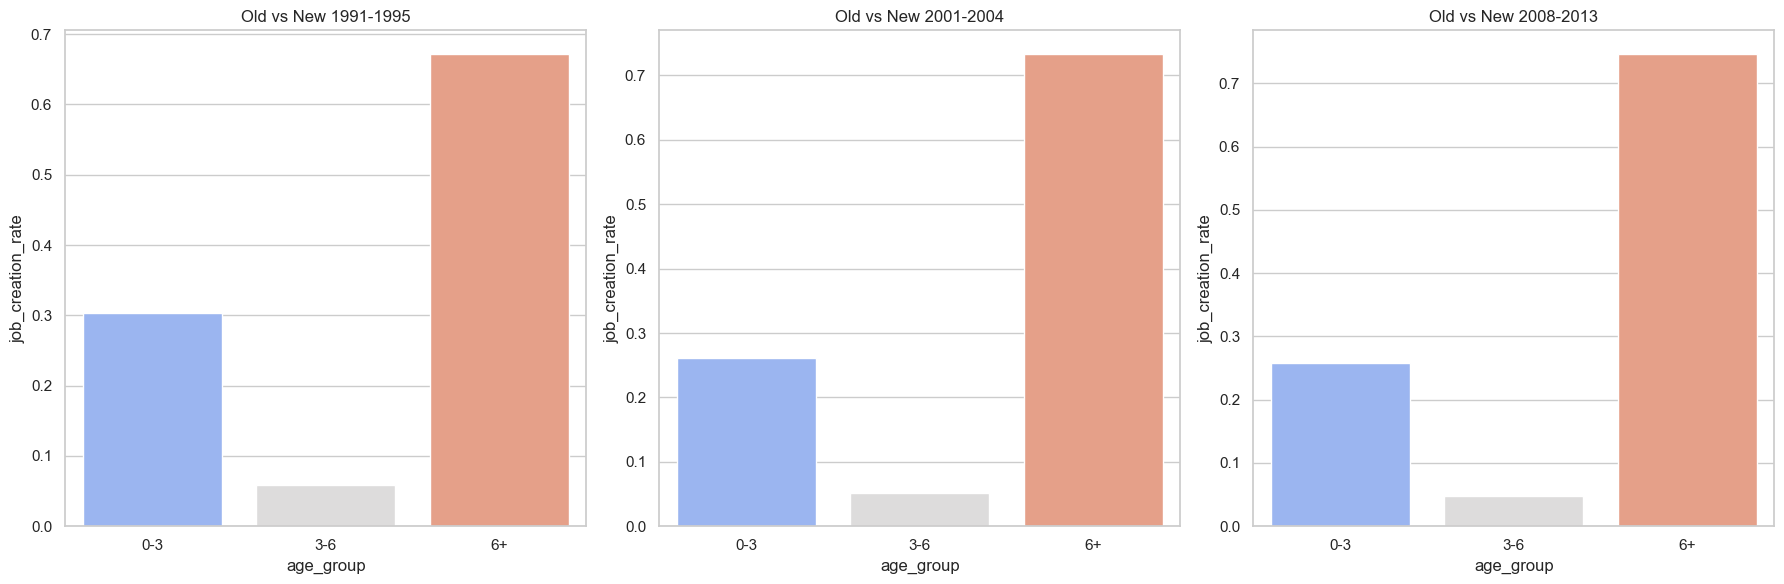

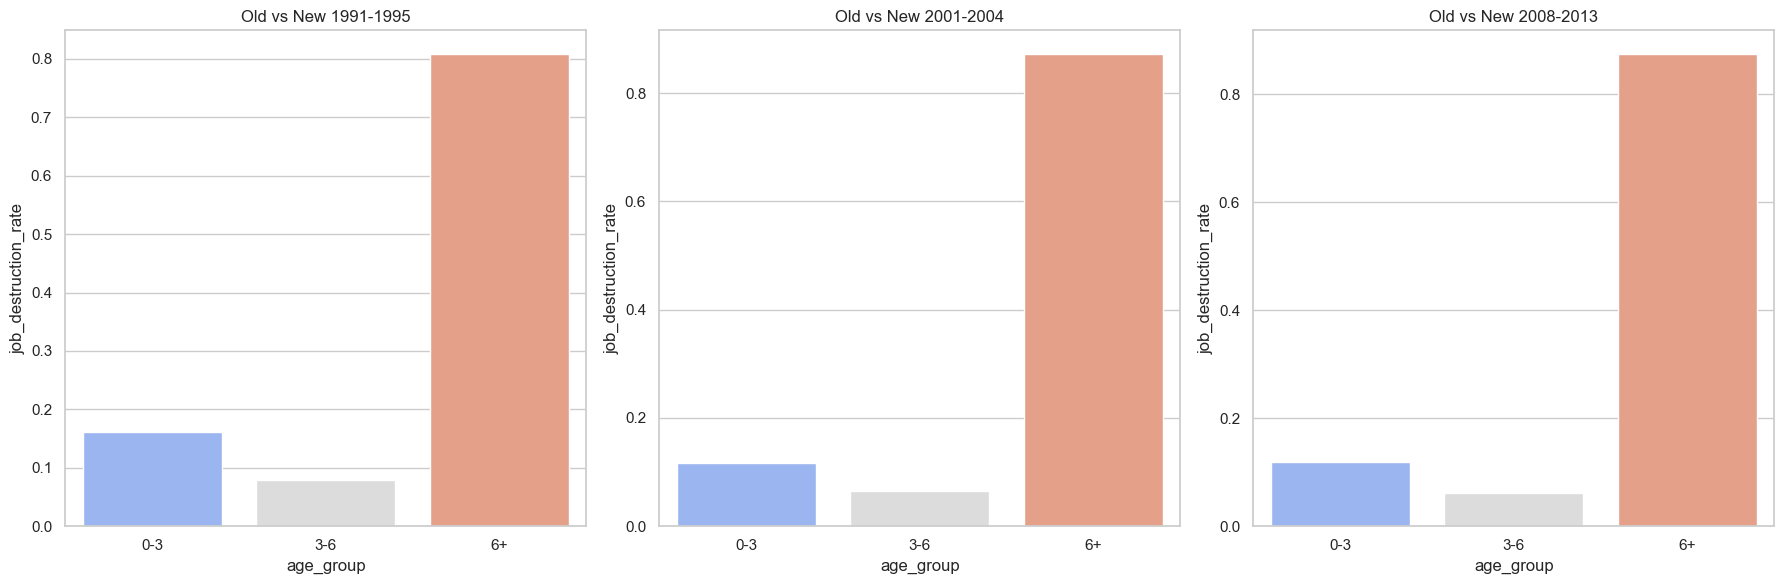

In [65]:
old_vs_new_1991_1995_rate = merged_df[(merged_df["Year"] >= 1991) & (merged_df["Year"] < 1996)][[ "Year" ,"age_group",'job_creation_rate', "job_destruction_rate"]]
old_vs_new_1991_1995_rate = old_vs_new_1991_1995_rate.groupby("age_group")[['job_creation_rate', "job_destruction_rate"]].mean()
old_vs_new_2001_2004_rate = merged_df[(merged_df["Year"] >= 2001) & (merged_df["Year"] < 2005)][[ "Year" ,"age_group",'job_creation_rate' , "job_destruction_rate"]]
old_vs_new_2001_2004_rate = old_vs_new_2001_2004_rate.groupby("age_group")[['job_creation_rate', "job_destruction_rate"]].mean()
old_vs_new_2008_2013_rate = merged_df[(merged_df["Year"] >= 2008) & (merged_df["Year"] < 2013)][[ "Year" ,"age_group",'job_creation_rate', "job_destruction_rate"]]
old_vs_new_2008_2013_rate = old_vs_new_2008_2013_rate.groupby("age_group")[['job_creation_rate', "job_destruction_rate"]].mean()

age_group_df1 = pd.DataFrame(old_vs_new_1991_1995_rate).reset_index()
age_group_df2 = pd.DataFrame(old_vs_new_2001_2004_rate).reset_index()
age_group_df3 = pd.DataFrame(old_vs_new_2008_2013_rate).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='age_group', y='job_creation_rate', data=age_group_df1, hue='age_group', ax=axes[0], palette='coolwarm')
axes[0].set_title('Old vs New 1991-1995')
sns.barplot(x='age_group', y='job_creation_rate', data=age_group_df2, hue='age_group', ax=axes[1], palette='coolwarm')
axes[1].set_title('Old vs New 2001-2004')
sns.barplot(x='age_group', y='job_creation_rate', data=age_group_df3,  hue='age_group', ax=axes[2], palette='coolwarm')
axes[2].set_title('Old vs New 2008-2013')
plt.tight_layout()
plt.show()

age_group_df11 = pd.DataFrame(old_vs_new_1991_1995_rate).reset_index()
age_group_df22 = pd.DataFrame(old_vs_new_2001_2004_rate).reset_index()
age_group_df33 = pd.DataFrame(old_vs_new_2008_2013_rate).reset_index()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='age_group', y='job_destruction_rate', data=age_group_df11, hue='age_group', ax=axes[0], palette='coolwarm')
axes[0].set_title('Old vs New 1991-1995')
sns.barplot(x='age_group', y='job_destruction_rate', data=age_group_df22, hue='age_group', ax=axes[1], palette='coolwarm')
axes[1].set_title('Old vs New 2001-2004')
sns.barplot(x='age_group', y='job_destruction_rate', data=age_group_df33,  hue='age_group', ax=axes[2], palette='coolwarm')
axes[2].set_title('Old vs New 2008-2013')
plt.tight_layout()
plt.show()

# מסכנה שניה: עסקים וותיקים מול עסקים חדשים
## ניתן לראות שעסקים קטנים נותנים יותר מקומות עבודה מעסקים וותיקים בתקופות של משברים גדולים. כמו כן עסקים גדולים נפגעים יותר ממשברים


# מסקנה שלישית: ננסה לחשוב מנקודת מבט של בעל חברה חדשה וננסה לבנות את המדינה האידיאלית לפתיחת חברה חדשה  


### ניקח מהנתונים עמודות שנוגעות לחברות מהתקופה של החמש שנים האחרונות שהם הכי רלוונטיות

### ונעשה דירוג לכל המדינות לפי כל פרמטר שנבחן

### אחר כך נסכום את כל הדירוגים והמדינה שתגיע לדירוג הטוב ביותר היא המדינה האידיאלית

חשוב לציין:  מכיוון שאין לנו נתונים על גודל האוכלוסיה שבכל מדינה,  כל פרמטר שיש במסקנה זו מחולק במספר החברות שיש בכל מדינה ומדינה.
בכך התגברנו על החוסר במידע על גודל המדינה.
 

יצרנו דאטה קטנה שמתייחסת רק לנתונים שרלוונטיים לנו על חברות ופירמות  

In [71]:
business_to_open = business_df[business_df['Year'] >= 2014].groupby('State')[['Data.Number of Firms','Data.Firm Exits.Count','Data.Job Creation.Births','Data.Job Creation.Continuers','Data.Job Destruction.Continuers','Data.Job Destruction.Deaths','Data.Establishments.Entered','Data.Establishments.Exited']].sum()
business_to_open                                

,Data.Number of Firms,Data.Firm Exits.Count,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Destruction.Continuers,Data.Job Destruction.Deaths,Data.Establishments.Entered,Data.Establishments.Exited
State,,,,,,,,
Alabama,339528,22146,299555,712667,615672,252421,36991,33484
Alaska,69791,5001,50665,121140,124114,50252,8673,7811
Arkansas,462189,36810,575570,1170733,931752,441827,66997,55955
California,227996,15537,188254,421913,370252,163760,25419,22803
Colorado,3228423,258208,3274572,6910005,5445727,2818142,443315,373225
Delaware,578572,45320,556084,1088572,862584,441906,83333,67862
District of Columbia,319426,21376,284494,600614,534811,270055,33979,33095
Florida,87992,5993,89747,194373,163815,73011,11177,9588
Georgia,82520,4920,107629,217433,190761,78252,10402,8719


יצרנו עמודה חדשה שמבטאת כמה אחוז מהחברות פשטו את הרגל בכל מדינה ומדינה

את חישוב האחוזים בחרנו לעשות עם מספר עשרוני אחד כדי שאם בין שתי מדינות יש הפרש מאוד זניח אז שהדירוג של שתי המדינות יהיה זהה

בצורה הזאת אנחנו גם לוקחים בחשבון את ההפרשים בין המדינות

In [73]:
business_to_open['Firm Exits per Number of Firms'] = ((business_to_open['Data.Firm Exits.Count'] / business_to_open['Data.Number of Firms'])*100).round(1)
business_to_open.sort_values('Firm Exits per Number of Firms')

,Data.Number of Firms,Data.Firm Exits.Count,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Destruction.Continuers,Data.Job Destruction.Deaths,Data.Establishments.Entered,Data.Establishments.Exited,Firm Exits per Number of Firms
State,,,,,,,,,
Louisiana,279496,16515,195056,499038,451997,167955,27790,25220,5.9
New Jersey,192244,11449,136084,325902,270179,123525,19967,17447,6.0
Georgia,82520,4920,107629,217433,190761,78252,10402,8719,6.0
Wisconsin,79757,4795,38818,98363,89419,37010,7223,7009,6.0
Vermont,98207,6049,55130,133163,119087,48393,9868,8676,6.2
Michigan,144060,8905,86412,197561,172008,76825,15530,13544,6.2
Texas,106741,6732,75950,176323,147881,66749,11182,10297,6.3
New York,137225,8684,104913,229746,192478,76701,14053,12860,6.3
South Dakota,1037770,65997,918742,2112235,1896785,808105,110397,103235,6.4


In [74]:
business_to_open_sorted_1 = business_to_open.sort_values(by='Firm Exits per Number of Firms')
business_to_open_sorted_1[['Firm Exits per Number of Firms']]

,Firm Exits per Number of Firms
State,
Louisiana,5.9
New Jersey,6.0
Georgia,6.0
Wisconsin,6.0
Vermont,6.2
Michigan,6.2
Texas,6.3
New York,6.3
South Dakota,6.4


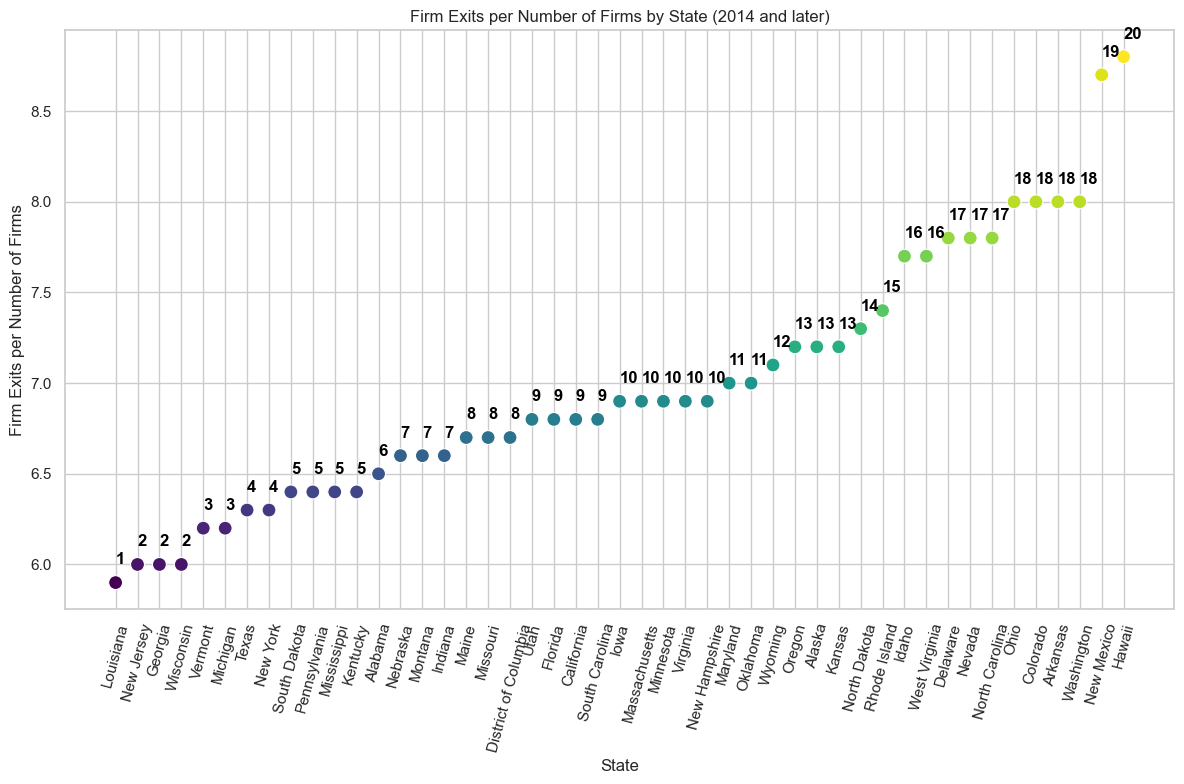

In [75]:
business_to_open_sorted_1['Ranking_1'] = business_to_open_sorted_1['Firm Exits per Number of Firms'].rank(method='dense')

plt.figure(figsize=(12, 8))
sns.scatterplot(x=business_to_open_sorted_1.index, y=business_to_open_sorted_1['Firm Exits per Number of Firms'], hue=business_to_open_sorted_1['Ranking_1'], palette='viridis', s=100, legend=False)

for i, (state, row) in enumerate(business_to_open_sorted_1.iterrows()):
    plt.text(i, row['Firm Exits per Number of Firms'] + 0.1, str(int(row['Ranking_1'])), horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Firm Exits per Number of Firms by State (2014 and later)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

יצרנו גרף שמראה את הדירוג של כל מדינה חשוב לשים לב שבמקרה זה ככל שהאחוז נמוך יותר זה אומר שיש במדינה פחות פשיטות רגל של חברות ולכן המדינה שמדורגת הכי נמוך היא במקום הראשון    

### בחלק זה נרצה לגלות איזה מדינה הכי מתפתחת מבחינת יצירת מקומות עבודה על ידי פתיחת סניפים חדשים   

יצירת עבודות נטו על ידי פתיחת סניפים 

(כאן ככל שהמקדם גבוה יותר זה מראה על מדינה יותר מפתפתחת לכן נדרג את המדינה עם המקדם הגבוה ביותר לנמוך ביותר)

In [79]:
business_to_open['Job Creation by opening Establishment'] = ((business_to_open['Data.Job Creation.Births'] - business_to_open['Data.Job Destruction.Deaths'])/ business_to_open['Data.Number of Firms']).round(3)
business_to_open_sorted_2 = business_to_open.sort_values(by='Job Creation by opening Establishment')
business_to_open_sorted_2['Ranking_2'] = business_to_open_sorted_2['Job Creation by opening Establishment'].rank(ascending=False, method='dense').astype(int)
business_to_open_sorted_2[['Job Creation by opening Establishment', 'Ranking_2']]

,Job Creation by opening Establishment,Ranking_2
State,,
Alaska,0.006,42
Wisconsin,0.023,41
District of Columbia,0.045,40
Kansas,0.056,39
New Jersey,0.065,38
Michigan,0.067,37
Vermont,0.069,36
Ohio,0.081,35
Texas,0.086,34


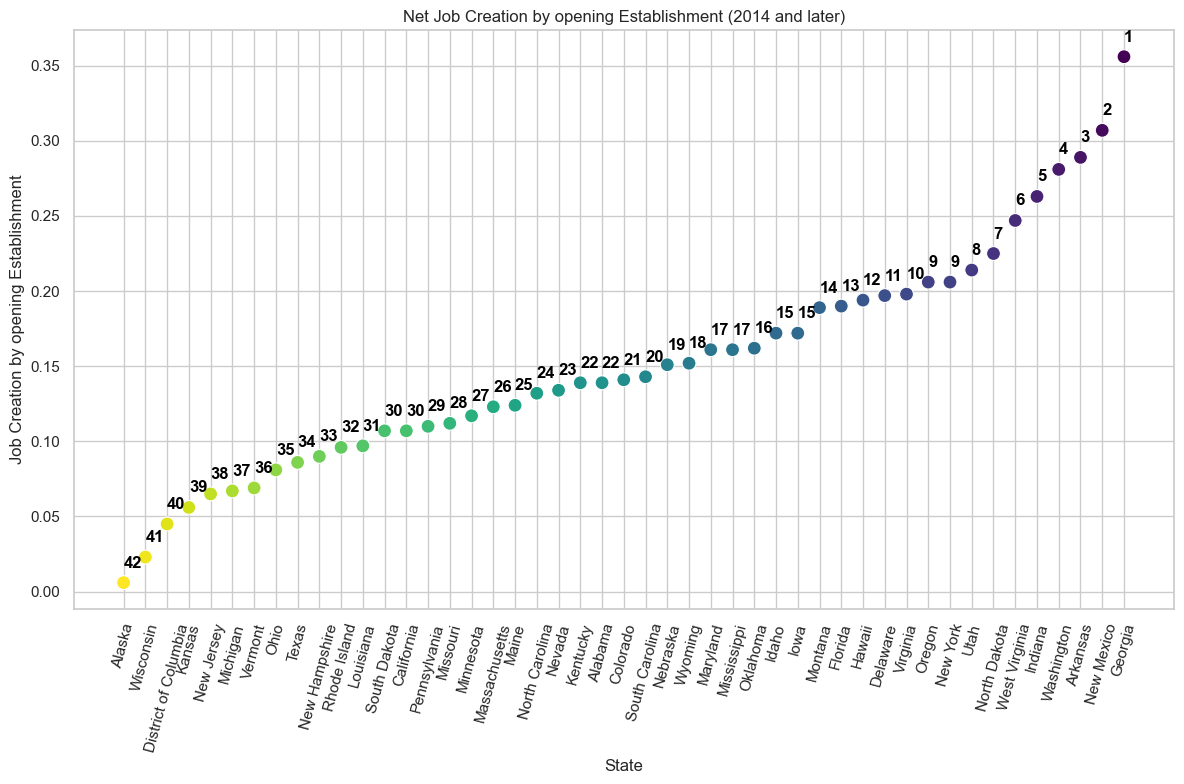

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=business_to_open_sorted_2.index, y=business_to_open_sorted_2['Job Creation by opening Establishment'], hue=business_to_open_sorted_2['Ranking_2'], palette='viridis', s=100, legend=False)

for i, (state, row) in enumerate(business_to_open_sorted_2.iterrows()):
    plt.text(i, row['Job Creation by opening Establishment'] + 0.01, str(int(row['Ranking_2'])), horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Net Job Creation by opening Establishment (2014 and later)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

יצרנו גרף שמראה את המדינה המתפתחת ביותר מבחינת יצירת מקומות עבודה על ידי פתיחת סניפים ואת המדינה הכי פחות מתפתחת

### לכל חברה חשוב לדעת האם אחרי ההקמה היא תוכל להתפתח, לכן בחלק זה בחנו את קצב הגידול של מקומות העבודה על ידי חברות קיימות

קצב התפתחות חברות קיימות

(בקטע זה הדירוג יתבצע לפי המדינה שיש לה את המקדם הגבוה ביותר לנמוך ביותר)

In [84]:
business_to_open['Job Creation by Existing Firm'] = ((business_to_open['Data.Job Creation.Continuers'] - business_to_open['Data.Job Destruction.Continuers'])/ business_to_open['Data.Number of Firms']).round(3)
business_to_open_sorted_3 = business_to_open.sort_values(by='Job Creation by Existing Firm')
business_to_open_sorted_3['Ranking_3'] = business_to_open_sorted_3['Job Creation by Existing Firm'].rank(ascending=False, method='dense').astype(int)
business_to_open_sorted_3[['Job Creation by Existing Firm', 'Ranking_3']]

,Job Creation by Existing Firm,Ranking_3
State,,
Oregon,-0.144,43
Massachusetts,-0.073,42
Alaska,-0.043,41
North Dakota,0.032,40
New Hampshire,0.077,39
Nebraska,0.086,38
Maine,0.105,37
Wisconsin,0.112,36
Rhode Island,0.121,35


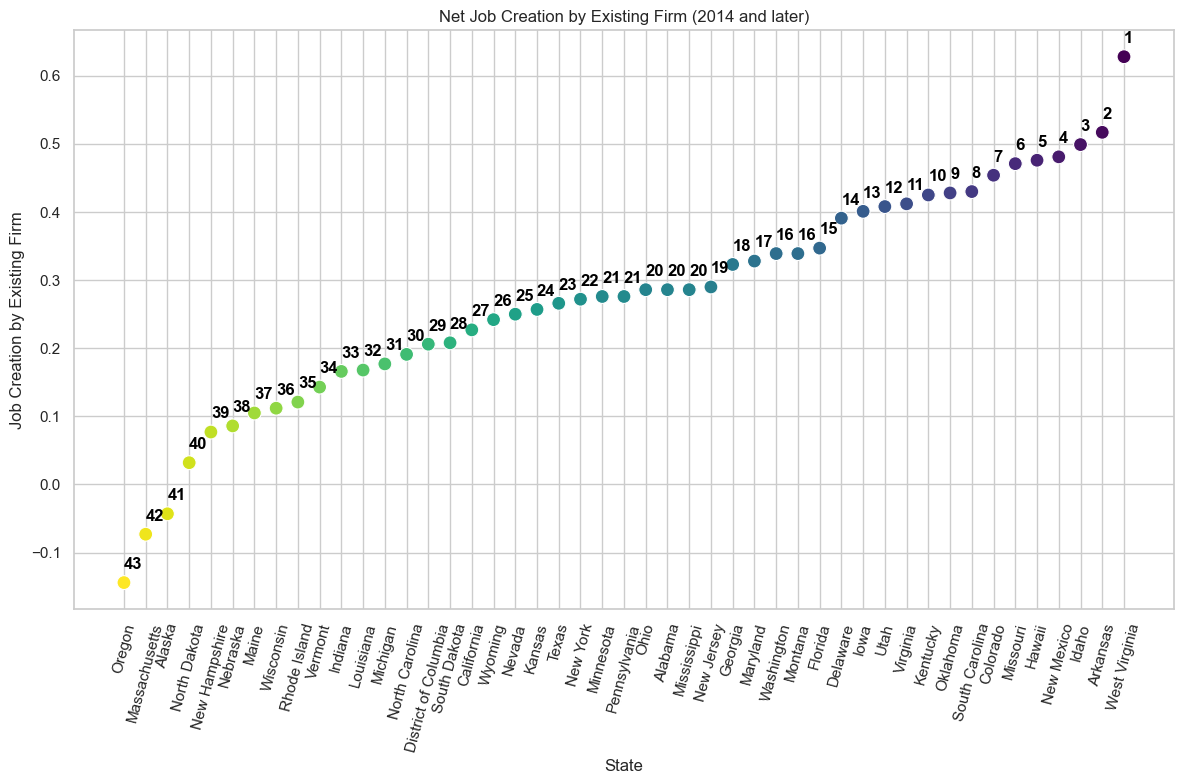

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=business_to_open_sorted_3.index, y=business_to_open_sorted_3['Job Creation by Existing Firm'], hue=business_to_open_sorted_3['Ranking_3'], palette='viridis', s=100, legend=False)

for i, (state, row) in enumerate(business_to_open_sorted_3.iterrows()):
    plt.text(i, row['Job Creation by Existing Firm'] + 0.02, str(int(row['Ranking_3'])), horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Net Job Creation by Existing Firm (2014 and later)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

### בחלק זה בחנו את קצב הגידול של מספר המשרדים בכל מדינה ומדינה

 קצב התפתחות משרדים
 
 בקטע זה נדרג מהמדינה עם המקדם הגבוה ביותר לנמוך ביותר

In [88]:
business_to_open['Establishments creation by Firm'] = ((business_to_open['Data.Establishments.Entered'] - business_to_open['Data.Establishments.Exited'])/ business_to_open['Data.Number of Firms']).round(3)
business_to_open_sorted_4 = business_to_open.sort_values(by='Establishments creation by Firm')
business_to_open_sorted_4['Ranking_4'] = business_to_open_sorted_4['Establishments creation by Firm'].rank(ascending=False, method='dense').astype(int)
business_to_open_sorted_4[['Establishments creation by Firm', 'Ranking_4']]

,Establishments creation by Firm,Ranking_4
State,,
North Dakota,0.002,24
District of Columbia,0.003,23
Wisconsin,0.003,23
North Carolina,0.005,22
Pennsylvania,0.005,22
Massachusetts,0.006,21
Kansas,0.007,20
Nebraska,0.007,20
South Dakota,0.007,20


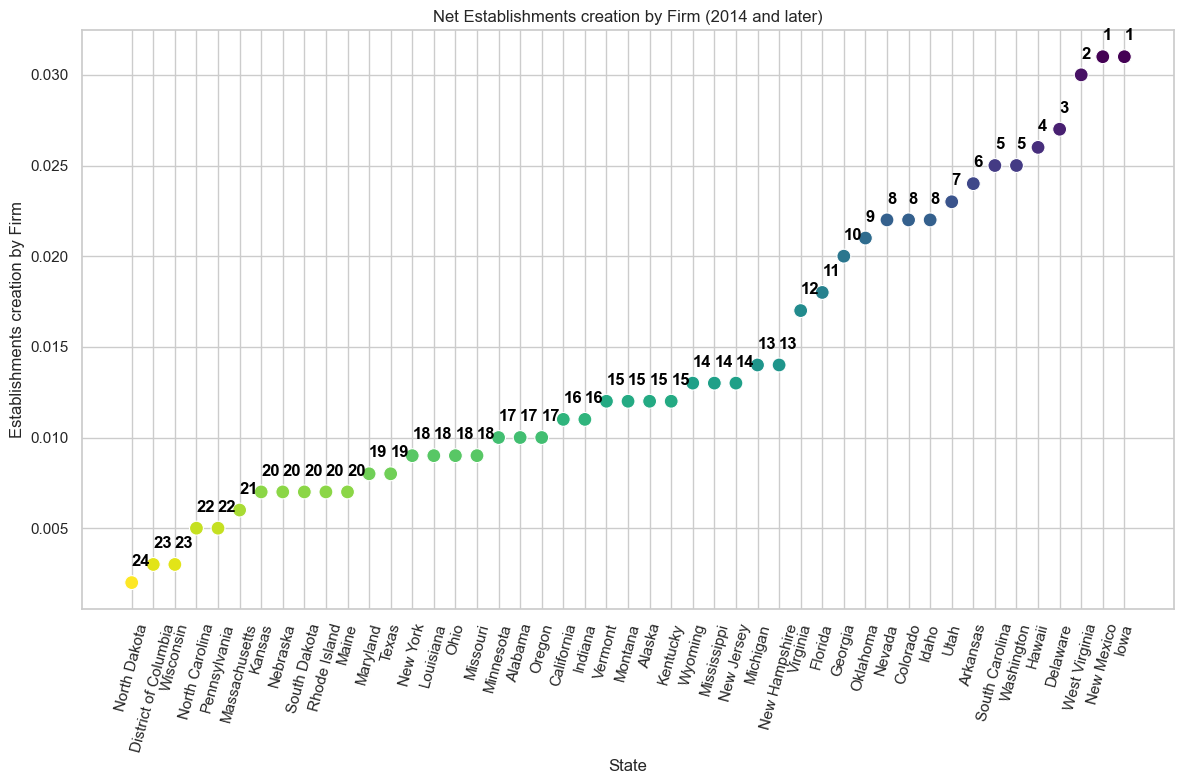

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=business_to_open_sorted_4.index, y=business_to_open_sorted_4['Establishments creation by Firm'], hue=business_to_open_sorted_4['Ranking_4'], palette='viridis', s=100, legend=False)

for i, (state, row) in enumerate(business_to_open_sorted_4.iterrows()):
    plt.text(i, row['Establishments creation by Firm'] + 0.0009, str(int(row['Ranking_4'])), horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Net Establishments creation by Firm (2014 and later)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

### אחרי שעשינו את הדירוגים שחשובים לפתיחת חברה חדשה, ניקח את כל הדירוגים ונמצא את המדינה שדורגה במקום הראשון

In [91]:
final_calculated = business_to_open_sorted_1['Ranking_1'] + business_to_open_sorted_2['Ranking_2'] + business_to_open_sorted_3['Ranking_3'] + business_to_open_sorted_4['Ranking_4']
final_calculated = final_calculated.sort_values(ascending=False)

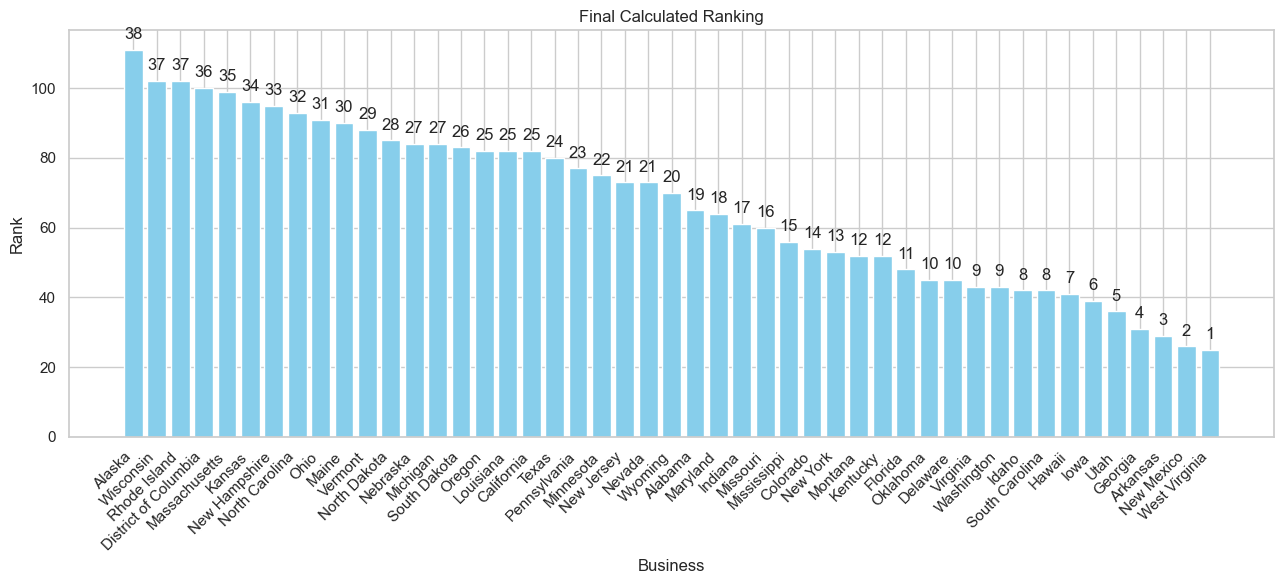

State
Alaska                  38
Wisconsin               37
Rhode Island            37
District of Columbia    36
Massachusetts           35
Kansas                  34
New Hampshire           33
North Carolina          32
Ohio                    31
Maine                   30
Vermont                 29
North Dakota            28
Nebraska                27
Michigan                27
South Dakota            26
Oregon                  25
Louisiana               25
California              25
Texas                   24
Pennsylvania            23
Minnesota               22
New Jersey              21
Nevada                  21
Wyoming                 20
Alabama                 19
Maryland                18
Indiana                 17
Missouri                16
Mississippi             15
Colorado                14
New York                13
Montana                 12
Kentucky                12
Florida                 11
Oklahoma                10
Delaware                10
Virginia              

In [92]:
final_calculated_sorted_ranked = final_calculated.rank(method='dense').astype(int)
categories = final_calculated.index.tolist()
values = final_calculated.tolist()
plt.figure(figsize=(13, 6))
bars = plt.bar(categories, values, color='skyblue')

for bar, rank in zip(bars, final_calculated_sorted_ranked):
    height = bar.get_height()
    plt.annotate(f'{rank}', xy=(bar.get_x() + bar.get_width() / 2, height + 1), 
                 xytext=(0, 3),  
                 textcoords="offset points", ha='center', va='bottom')

plt.title('Final Calculated Ranking')
plt.xlabel('Business')
plt.ylabel('Rank')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()
final_calculated_sorted_ranked

#### בגרף הבא ניתן לראות הדירוג של כל 47 המדינות, כאשר המדינה עם הדירוג הנמוך ביותר זו המדינה האידיאלית
ניתן לראות בגרף שיש כמה מדינות שהגיעו לאותו הדירוג

#    מסקנה שלישית:

## לפי הגרף ניתן לראות שלפי כל הגורמים שבחנו, המדינה האידיאלית לפתיחת חברה חדשה היא מערב וירגיניה  

## והמדינה הכי לא אידיאלית לפתיחת חברה חדשה היא אלסקה

# תופעה מעניינת 
## בדיקות קורלציה

<Axes: >

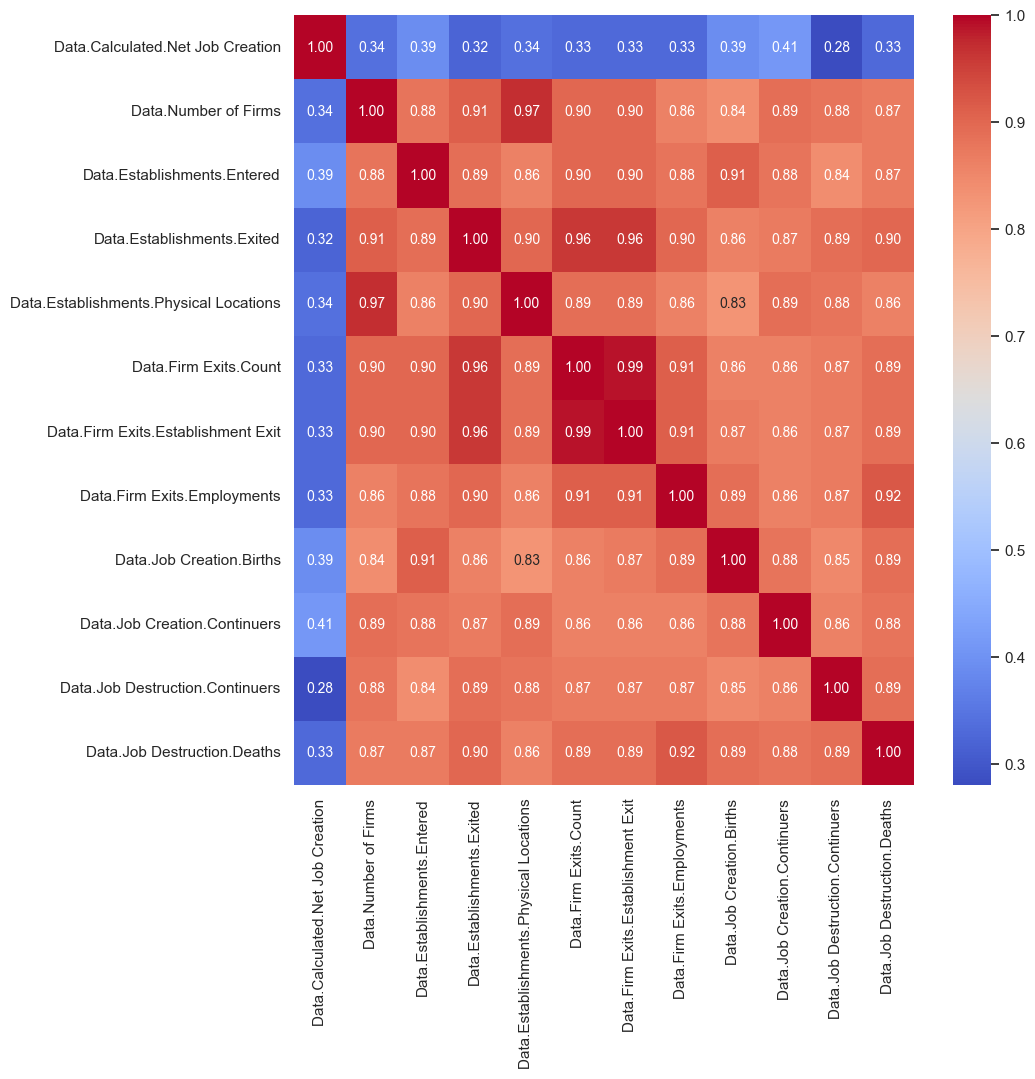

In [96]:
mylist = ["Data.Calculated.Net Job Creation",'Data.Number of Firms', 'Data.Establishments.Entered', 'Data.Establishments.Exited',
       'Data.Establishments.Physical Locations', 'Data.Firm Exits.Count',
       'Data.Firm Exits.Establishment Exit', 'Data.Firm Exits.Employments',
       'Data.Job Creation.Births', 'Data.Job Creation.Continuers', 'Data.Job Destruction.Continuers','Data.Job Destruction.Deaths']
usa_corr_data = business_df[mylist]
plt.figure(figsize=(10,10))
correlation_matrix = usa_corr_data.corr(method = "kendall").round(2)
#sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm')
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

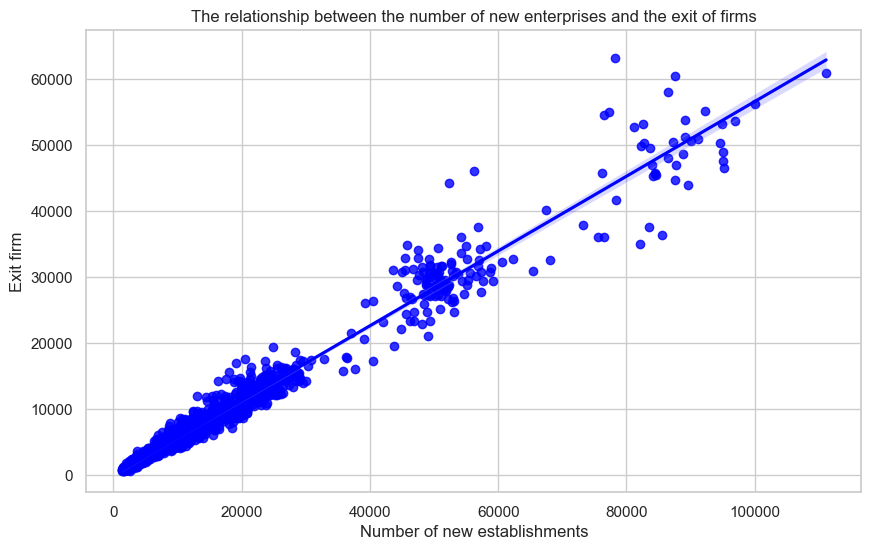

In [97]:
sns.set_style("whitegrid")


establishments_entered = usa_corr_data['Data.Establishments.Entered']
firm_exit = usa_corr_data['Data.Firm Exits.Count']


plt.figure(figsize=(10, 6))
sns.regplot(x=establishments_entered, y=firm_exit, color='blue')
plt.title('The relationship between the number of new enterprises and the exit of firms')
plt.xlabel('Number of new establishments')
plt.ylabel('Exit firm')
plt.grid(True)
plt.show()

# מסכנה רביעית: קורלציה חזקה
##  מצאנו קורלציה חזקה להפתעתינו בין מספר מפעלים\משרדים שנכניסים לשוק ובין מספר יציואות חברות מהשוק. לאחר התייעצות עם צאט גפט הגענו למסכנה שתופעה מדברת על התחרות בשוק 